<a href="https://colab.research.google.com/github/natzasu13/microexpresion-recognition/blob/negative-microexpresions/Microexpression_recognition_tesis_maestria_MicroExpSTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Microexpresion recognition**
**MicroExpSTCNN Model**

Natalia Zartha
Maestria en Ingenira de Sistemas y Computación, 2021

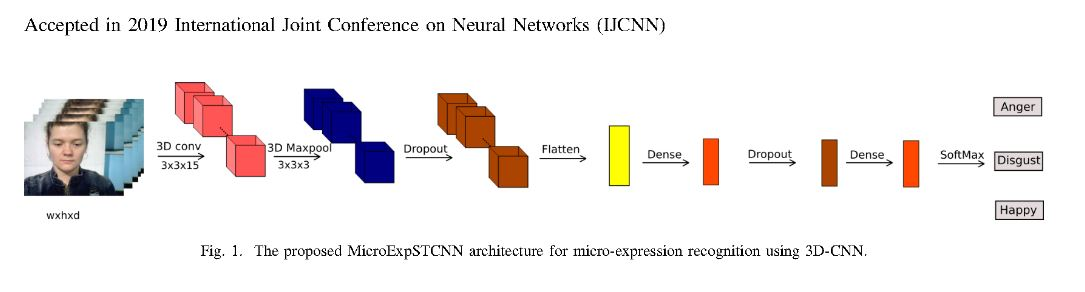

In [1]:
import os
import cv2
import numpy
import imageio
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from keras.optimizers import SGD, RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils, generic_utils
from sklearn.model_selection import train_test_split
from keras import backend as K
import sys
from matplotlib import pyplot as plt


#K.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

#Import files from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#SMIC

#Load images

In [3]:
image_rows, image_columns, image_depth = 64, 64, 18

training_list = []

CODE_PATH = 'drive/MyDrive/MAESTRIA ING DE SISTEMAS/1. MICROEXPRESIONES FACIALES TRABAJO DE GRADO/3. Codigo/microexpresion-recognition-colab'
SMIC_path = CODE_PATH + '/datasets/SMIC'
CASMEII_path = CODE_PATH + '/datasets/CASMEII'

HSpath =SMIC_path +'/SMIC_all_cropped/HS/'

print("-------------------------negativepath----------------------")  

rootDirectory = os.listdir(HSpath)
for s in rootDirectory:
    sPath = HSpath + s + "/micro/negative/"
    microPath = os.listdir(sPath)
    for video in microPath:
        videopath = sPath + video

        frames = []
        framelisting = os.listdir(videopath)
        framesCount = image_depth if len(framelisting) > image_depth else 0
     
        print("framesCount")
        print(framesCount)

        framerange = [x for x in range(18)]

        if(framesCount != 0):
            for frame in framerange:
                  imagepath = videopath + "/" + framelisting[frame]

                  image = cv2.imread(imagepath)
                  imageresize = cv2.resize(image, (image_rows, image_columns), interpolation = cv2.INTER_AREA)
                  grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
                  frames.append(grayimage)
                  
        frames = numpy.asarray(frames)
        videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
        
        training_list.append(videoarray)
        print(len(training_list))


    print("-------------------------positivepath----------------------")  

    sPath = HSpath + s + "/micro/positive/"
    microPath = os.listdir(sPath)
    for video in microPath:
        videopath = sPath + video
        frames = []
        framelisting = os.listdir(videopath)
        framesCount = image_depth if len(framelisting) > image_depth else 0

        framerange = [x for x in range(18)]

        print("framesCount")
        print(framesCount)

        if(framesCount != 0):
            for frame in framerange:
                  imagepath = videopath + "/" + framelisting[frame]
                  image = cv2.imread(imagepath)
                  imageresize = cv2.resize(image, (image_rows, image_columns), interpolation = cv2.INTER_AREA)
                  grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
                  frames.append(grayimage)

        frames = numpy.asarray(frames)
        videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
        
        training_list.append(videoarray)
        print(len(training_list))


    print("-------------------------surprise----------------------")  

    sPath = HSpath + s + "/micro/surprise/"
    microPath = os.listdir(sPath)
    for video in microPath:
        videopath = sPath + video
        frames = []
        framelisting = os.listdir(videopath)
        framesCount = image_depth if len(framelisting) > image_depth else 0

        framerange = [x for x in range(18)]

        print("framesCount")
        print(framesCount)

        if(framesCount != 0):
            for frame in framerange:
                  imagepath = videopath + "/" + framelisting[frame]
                  image = cv2.imread(imagepath)
                  imageresize = cv2.resize(image, (image_rows, image_columns), interpolation = cv2.INTER_AREA)
                  grayimage = cv2.cvtColor(imageresize, cv2.COLOR_BGR2GRAY)
                  frames.append(grayimage)

        frames = numpy.asarray(frames)
        videoarray = numpy.rollaxis(numpy.rollaxis(frames, 2, 0), 2, 0)
        
        training_list.append(videoarray)
        print(len(training_list))









-------------------------negativepath----------------------
framesCount
18
1
framesCount
18
2
framesCount
18
3
-------------------------positivepath----------------------
framesCount
18
4
framesCount
18
5
framesCount
18
6
-------------------------surprise----------------------
framesCount
18
7
framesCount
18
8
framesCount
18
9
-------------------------positivepath----------------------
-------------------------surprise----------------------
framesCount
18
10
framesCount
18
11
framesCount
18
12
framesCount
18
13
framesCount
18
14
-------------------------positivepath----------------------
framesCount
18
15
-------------------------surprise----------------------
framesCount
18
16
framesCount
18
17
framesCount
18
18
framesCount
18
19
framesCount
18
20
framesCount
18
21
-------------------------positivepath----------------------
framesCount
18
22
-------------------------surprise----------------------
framesCount
18
23
framesCount
18
24
framesCount
18
25
framesCount
18
26
framesCount
18
27

AxisError: ignored

#Training

In [6]:
#164 imagenes que se conviernes en escala de gris
#64x64 tamaño
#18 frames 


training_list = numpy.asarray(training_list)
trainingsamples = len(training_list)

print("trainingsamples")
print(trainingsamples)

traininglabels = numpy.zeros((trainingsamples, ), dtype = int)

traininglabels[0:66] = 0
traininglabels[66:113] = 1
traininglabels[113:156] = 2

traininglabels = np_utils.to_categorical(traininglabels, 3)

training_data = [training_list, traininglabels]
(trainingframes, traininglabels) = (training_data[0], training_data[1])

training_set = numpy.zeros((trainingsamples, 1, image_rows, image_columns, image_depth))

print("range(trainingsamples) is the value of h")
print(range(trainingsamples))

for h in range(trainingsamples):
    training_set[h][0][:][:][:] = trainingframes[h, :, :, :]


training_set = training_set.astype('float32')
training_set -= numpy.mean(training_set)
training_set /= numpy.max(training_set)

print("training_set.shape")
print(training_set.shape)

# Save training images and labels in a numpy array
numpy.save(CODE_PATH+'/numpy_training_datasets/microexpstcnn_images.npy', training_set)
numpy.save(CODE_PATH+'/numpy_training_datasets/microexpstcnn_labels.npy', traininglabels)

# Load training images and labels that are stored in numpy array
"""
training_set = numpy.load(CODE_PATH+'/numpy_training_datasets/microexpstcnn_images.npy')
traininglabels =numpy.load(CODE_PATH+'/numpy_training_datasets/microexpstcnn_labels.npy')
"""

trainingsamples
98
range(trainingsamples) is the value of h
range(0, 98)
training_set.shape
(98, 1, 64, 64, 18)


"\ntraining_set = numpy.load(CODE_PATH+'/numpy_training_datasets/microexpstcnn_images.npy')\ntraininglabels =numpy.load(CODE_PATH+'/numpy_training_datasets/microexpstcnn_labels.npy')\n"

#Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 32, 62, 62, 4)     4352      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 32, 20, 20, 1)     0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 20, 20, 1)     0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1638528   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

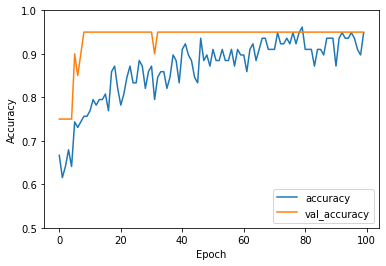

In [8]:

# MicroExpSTCNN Model
model = Sequential()
model.add(Convolution3D(32, (3, 3, 15), input_shape=(1, image_rows, image_columns, image_depth), activation='relu'))
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(128, init='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(3, init='normal'))
model.add(Dense(3, kernel_initializer='normal'))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

model.summary()

filepath=CODE_PATH+"/weights_microexpstcnn/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#########filepath=CODE_PATH+"/weights_microexpstcnn/model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Load pre-trained weights
#model.load_weights(CODE_PATH+'/weights_microexpstcnn/weights-improvement-40-0.69.hdf5')
model.load_weights(CODE_PATH+'/weights_microexpstcnn/weights-improvement-01-1.00.hdf5')

# Spliting the dataset into training and validation setsl
train_images, validation_images, train_labels, validation_labels =  train_test_split(training_set, traininglabels, test_size=0.2, random_state=4)

# Save validation set in a numpy array
numpy.save(CODE_PATH+'/numpy_validation_dataset/microexpstcnn_val_images.npy', validation_images)
numpy.save(CODE_PATH+'/numpy_validation_dataset/microexpstcnn_val_labels.npy', validation_labels)

# Load validation set from numpy array
validation_images = numpy.load(CODE_PATH+'/numpy_validation_dataset/microexpstcnn_val_images.npy')
validation_labels = numpy.load(CODE_PATH+'/numpy_validation_dataset/microexpstcnn_val_labels.npy')


# Training the model
#hist = model.fit(train_images, train_labels, validation_data = (validation_images, validation_labels), callbacks=callbacks_list, batch_size = 16, nb_epoch = 100, shuffle=True)
hist = model.fit(train_images, train_labels, validation_data = (validation_images, validation_labels), callbacks=callbacks_list, batch_size = 16, epochs = 100, shuffle=True)


plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss, test_acc = model.evaluate(validation_images,  validation_labels, verbose=2)
print("test_acc")
print(test_acc)

#Predictions


In [9]:

# Finding Confusion Matrix using pretrained weights

print("------------------validation_images--------------------")
print(validation_images.shape)
print(validation_images)
print("------------------validation_labels--------------------")
print(validation_labels.shape)
print(validation_labels)



predictions = model.predict(validation_images)
predictions_labels = numpy.argmax(predictions, axis=1)


print("-------------------predictions------------------------")
print(predictions)
print("-------------------predictions_labels-----------------")
print(predictions_labels.shape)
print(predictions_labels)

validation_labels_y = numpy.argmax(validation_labels, axis=1)



print("-------------------validation_labels_new---------------")
print(validation_labels_y.shape)
print(validation_labels_y)

cfm = confusion_matrix(validation_labels_y, predictions_labels)
print("------------------------------confusion_matrix------------------------------")
print (cfm)

print('Accuracy score :', accuracy_score(validation_labels_y,predictions_labels) )


print('Classification report :', classification_report(validation_labels_y,predictions_labels) )


#precision, recall, thresholds = precision_recall_curve(validation_labels_y,predictions_labels)


------------------validation_images--------------------
(20, 1, 64, 64, 18)
[[[[[-1.06415801e-01 -1.06415801e-01 -1.06415801e-01 ...
     -1.18186176e-01 -1.12300985e-01 -1.18186176e-01]
    [-4.82365431e-04 -6.36755629e-03 -4.82365431e-04 ...
     -1.81379374e-02 -1.22527471e-02 -1.81379374e-02]
    [ 7.60251135e-02  7.60251135e-02  8.19103047e-02 ...
      7.01399222e-02  7.60251135e-02  7.01399222e-02]
    ...
    [-1.06415801e-01 -1.12300985e-01 -1.06415801e-01 ...
     -1.06415801e-01 -9.46454182e-02 -1.06415801e-01]
    [-1.94693655e-01 -2.00578853e-01 -1.94693655e-01 ...
     -1.94693655e-01 -1.82923272e-01 -1.94693655e-01]
    [-2.82971531e-01 -2.82971531e-01 -2.88856715e-01 ...
     -2.88856715e-01 -2.77086318e-01 -2.82971531e-01]]

   [[-4.16787006e-02 -4.75638919e-02 -5.34490831e-02 ...
     -5.93342707e-02 -4.75638919e-02 -6.52194619e-02]
    [ 5.24843521e-02  4.65991609e-02  4.65991609e-02 ...
      4.07139696e-02  4.65991609e-02  4.07139696e-02]
    [ 9.95658785e-02  9.36

In [ ]:
train_images.shape


In [ ]:
validation_images.shape

In [ ]:

#y_predit = model.predict(train_images[:,:,:,:,14])








#revisar x el que el train_images.shape esta dando con el  4, 1


#revisar el modelo 

#por que los traingns deben ser asi
#traings
#1, 64, 64, 3

#todas las imagenes 
#18, 1, 64, 64, 3

#y revisar por que solo se tienen 18 imagenes

#Save model as json string

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)